1. R-squared (
𝑅
2
) measures the proportion of variance in the dependent variable explained by the independent variables. It ranges from 0 to 1:

𝑅
2
=
1
: Perfect fit; all variance in Y is explained.

𝑅
2
=
0
: No explanatory power.

2. Linear regression relies on several key assumptions:

Linearity: The relationship between X and Y is linear.

Independence: Observations are independent of each other.

Homoscedasticity: The residuals have constant variance.

Normality: Residuals are normally distributed.

No multicollinearity: Predictors should not be highly correlated.

3. 𝑅
2
 measures how well the regression explains variability.

Adjusted
𝑅
2
 penalizes excessive predictors, ensuring only useful variables improve the model.

4. MSE measures the average squared difference between actual and predicted values. It is preferred because it:

Penalizes larger errors more than smaller ones.

Ensures differentiability, making optimization easier.

5. An Adjusted
𝑅
2
 of 0.85 suggests that 85% of the variance in Y is explained by the predictors, considering only significant independent variables.

6. Common methods include:

Histogram of residuals.

Q-Q Plot (Quantile-Quantile Plot).

Shapiro-Wilk test (statistical test for normality).

7. Multicollinearity occurs when predictors are highly correlated. It leads to:

Unstable coefficient estimates.

Incorrect variable significance tests.

Difficulty in interpreting relationships.

8. MAE is the average absolute difference between actual and predicted values. Unlike MSE, it does not square errors, making it less sensitive to outliers.

9. Automates preprocessing and model training.

Standardizes workflows, reducing human errors.

Improves reproducibility.

Handles scaling, feature engineering, and validation seamlessly.

10. RMSE (Root Mean Squared Error) is the square root of MSE, ensuring it has the same units as the target variable. This makes interpretation easier.

11. Pickling is a process used to serialize (save) Python objects for later use. In ML, pickling is useful for:

Saving trained models so they can be loaded without retraining.

Transferring data between programs without reprocessing.

Storing feature-engineered datasets for efficient re-use.

12. A high
𝑅
2
 (close to 1) indicates that the regression model explains a large proportion of variability in the dependent variable. However, a high
𝑅
2
 alone does not guarantee a good model—it can sometimes indicate overfitting.

13. Violating assumptions can lead to:

Biased or inefficient estimates (if normality or homoscedasticity is violated).

Incorrect significance tests (if independence or normality assumptions are violated).

Multicollinearity distortions, affecting coefficient interpretation.

Unreliable predictions and poor generalization to new data.

14. Remove highly correlated predictors from the model.

Use dimensionality reduction techniques like Principal Component Analysis (PCA).

Use Ridge Regression or Lasso Regression, which regularize coefficients to reduce sensitivity.

15. Feature selection:

Reduces overfitting by eliminating irrelevant predictors.

Improves interpretability by keeping only significant variables.

Enhances model accuracy by focusing on influential features.

Speeds up computation, reducing complexity.

16. Adjusted
𝑅
2
 is calculated using:

Adjusted
𝑅
2
=
1
−
(
(
1
−
𝑅
2
)
×
(
𝑛
−
1
)
𝑛
−
𝑘
−
1
)
where:

𝑛
 = Number of observations.

𝑘
 = Number of predictors.

This formula penalizes unnecessary predictors, ensuring they improve the model.

17. MSE squares each error, meaning larger errors have a disproportionately large impact. Outliers, which have high deviations, increase MSE significantly, making models seem worse than they might actually be.

18. Homoscedasticity ensures that residual variance remains constant across all values of the independent variables. Violations lead to inefficiencies, causing biased confidence intervals and unreliable hypothesis tests.

19. RMSE measures the average magnitude of prediction errors and is calculated as:

RMSE
=
MSE
It is useful for evaluating model accuracy in real-world units.

20. Pickling can be risky because:

Pickled files can be corrupted or version-incompatible.

Security risks exist—a maliciously crafted pickle file can execute unwanted code.

Limited cross-language compatibility—Python pickles may not work in other programming languages.

21. Joblib (import joblib) – optimized for large NumPy arrays.

JSON & CSV – suitable for structured data.

HDF5 – used for deep learning models (TensorFlow/Keras).

ONNX – an open standard for ML model portability across frameworks.

22. Heteroscedasticity occurs when residual variance changes across different values of independent variables. It's problematic because:

It violates linear regression assumptions.

Leads to inefficient estimates.

Distorts hypothesis testing, making confidence intervals unreliable.

23. Interaction terms allow modeling combined effects of variables:

They capture relationships that can't be explained by individual predictors alone.

Useful when the effect of one variable depends on the value of another.

Example: If X1 and X2 influence sales differently when combined, their interaction (X1 \ X2*) adds predictive power.

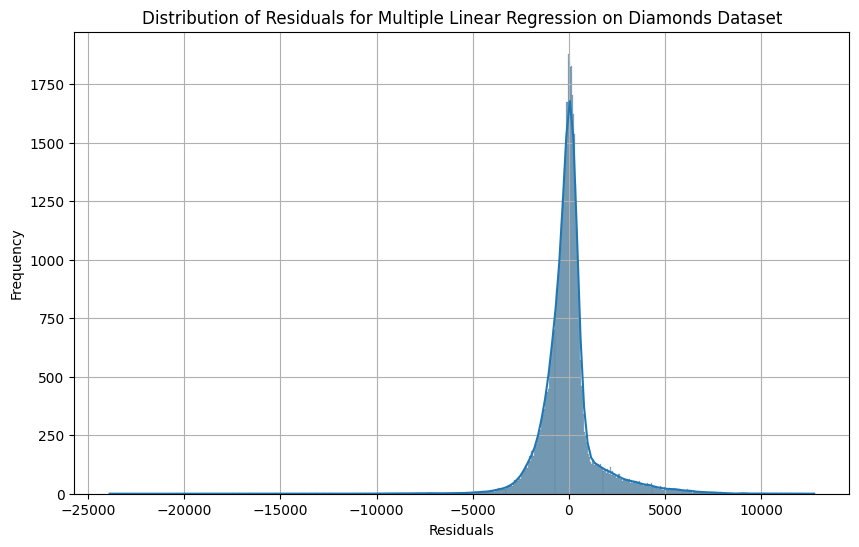

In [1]:
# prompt: Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
# using Seaborn's "diamonds" dataset.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select independent and dependent variables
# We'll use a few numerical features as predictors
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Add a constant to the independent variables matrix for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X.astype(float)).fit() # Ensure data types are float

# Get the residuals
residuals = model.resid

# Visualize the distribution of residuals using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals for Multiple Linear Regression on Diamonds Dataset')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [2]:
# prompt:  Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
# Mean Squared Error (RMSE) for a linear regression model.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions
predictions = model.predict(X.astype(float))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 2240581.73
Mean Absolute Error (MAE): 889.34
Root Mean Squared Error (RMSE): 1496.86


Checking Linearity:


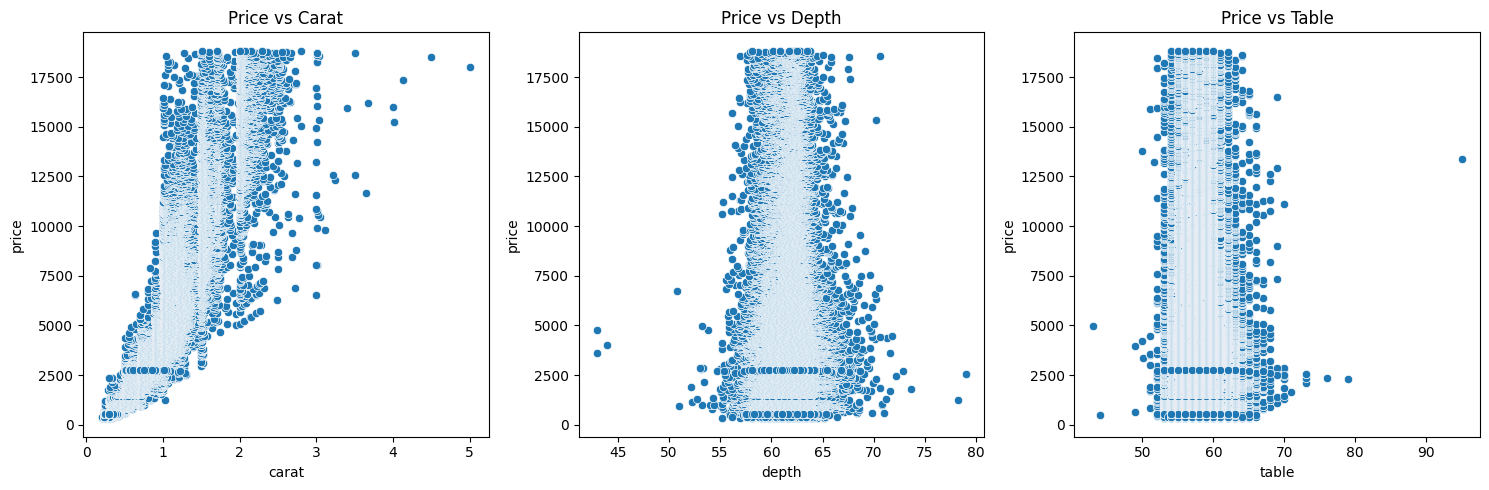

Observation: The relationships appear somewhat non-linear, especially with 'carat'. Transformations might be needed.

Checking Homoscedasticity:


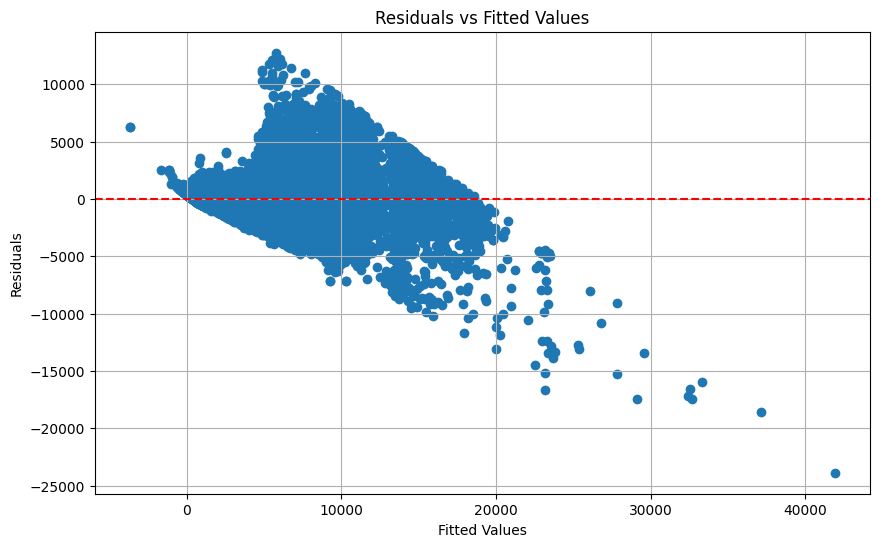

Observation: There is a fanning-out pattern in the residuals, indicating heteroscedasticity (non-constant variance).

Checking Multicollinearity:


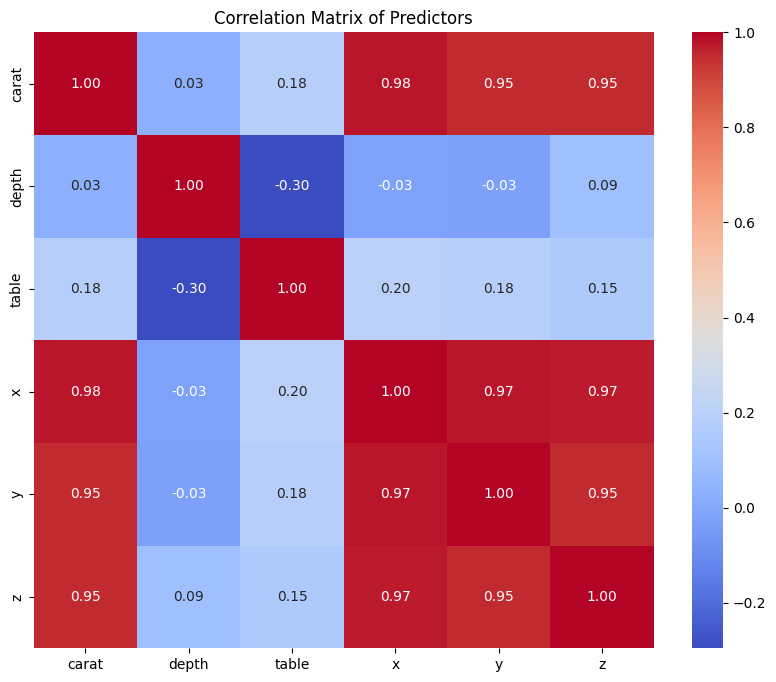

Observation: High correlations are observed between some predictors (e.g., x, y, z are highly correlated with carat). This indicates multicollinearity.

Summary of Assumption Checks:
- Linearity: The relationship between price and some predictors (like carat) is non-linear.
- Homoscedasticity: The residuals plot shows clear heteroscedasticity.
- Multicollinearity: High correlations exist between several predictor variables.

Based on these checks, the assumptions of linear regression are not fully met. Transformations, feature selection, or regularization techniques might be necessary to improve the model.


In [3]:
# prompt: Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
# linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

# 1. Check Linearity using Scatter Plots
print("Checking Linearity:")
# It's impractical to plot against all predictors at once, so we'll plot dependent variable vs a few key predictors.
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=diamonds['carat'], y=y)
plt.title('Price vs Carat')

plt.subplot(1, 3, 2)
sns.scatterplot(x=diamonds['depth'], y=y)
plt.title('Price vs Depth')

plt.subplot(1, 3, 3)
sns.scatterplot(x=diamonds['table'], y=y)
plt.title('Price vs Table')

plt.tight_layout()
plt.show()

print("Observation: The relationships appear somewhat non-linear, especially with 'carat'. Transformations might be needed.")

# 2. Check Homoscedasticity using Residuals Plot
print("\nChecking Homoscedasticity:")
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

print("Observation: There is a fanning-out pattern in the residuals, indicating heteroscedasticity (non-constant variance).")

# 3. Check Multicollinearity using Correlation Matrix
print("\nChecking Multicollinearity:")
correlation_matrix = X.drop(columns=['const']).corr() # Exclude the constant column
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Predictors')
plt.show()

print("Observation: High correlations are observed between some predictors (e.g., x, y, z are highly correlated with carat). This indicates multicollinearity.")

# Summary of findings
print("\nSummary of Assumption Checks:")
print("- Linearity: The relationship between price and some predictors (like carat) is non-linear.")
print("- Homoscedasticity: The residuals plot shows clear heteroscedasticity.")
print("- Multicollinearity: High correlations exist between several predictor variables.")
print("\nBased on these checks, the assumptions of linear regression are not fully met. Transformations, feature selection, or regularization techniques might be necessary to improve the model.")

Regression Model Performance:
----------------------------------------
Linear Regression:
  MSE: 2242178.90
  RMSE: 1497.39
  R-squared: 0.8590
----------------------------------------
Ridge Regression:
  MSE: 2242190.28
  RMSE: 1497.39
  R-squared: 0.8590
----------------------------------------
Lasso Regression:
  MSE: 2242719.23
  RMSE: 1497.57
  R-squared: 0.8589
----------------------------------------
Random Forest Regressor:
  MSE: 1901096.41
  RMSE: 1378.80
  R-squared: 0.8804
----------------------------------------
Gradient Boosting Regressor:
  MSE: 1806313.36
  RMSE: 1343.99
  R-squared: 0.8864
----------------------------------------


<ipython-input-4-88e49bafe620>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='viridis')


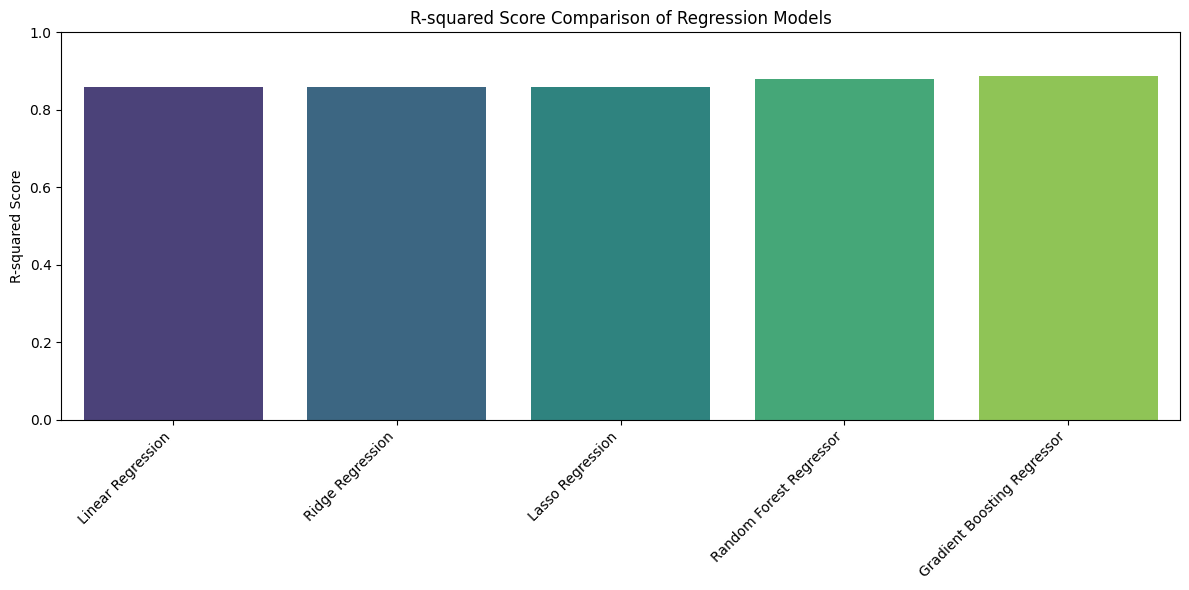

<ipython-input-4-88e49bafe620>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_scores, palette='plasma')


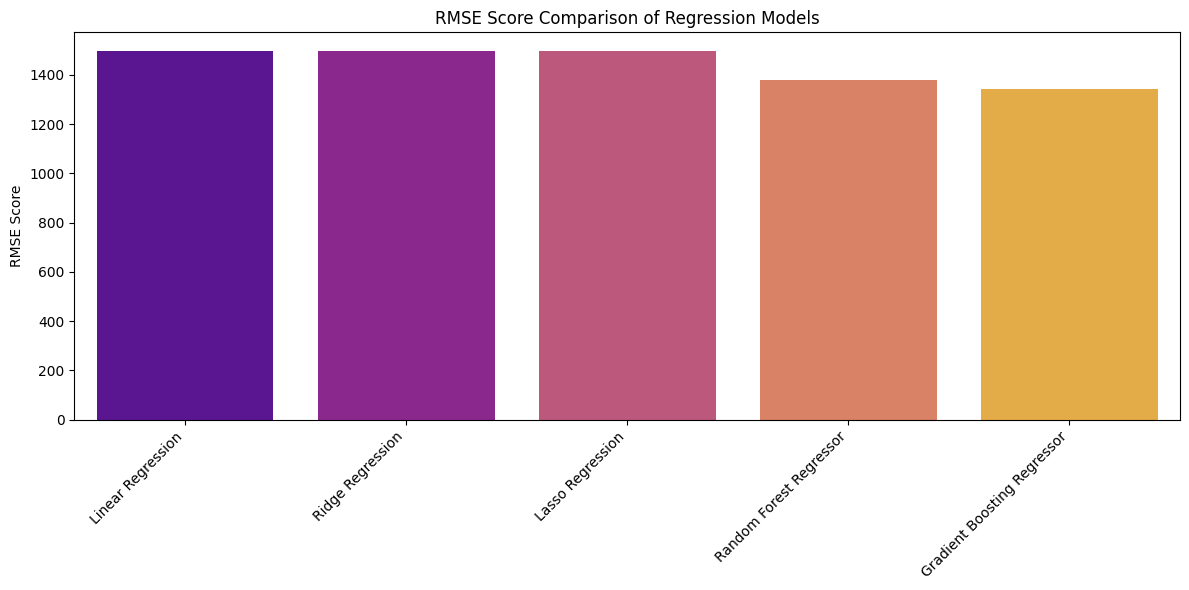

In [4]:
# prompt:  Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
# performance of different regression models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select independent and dependent variables
# We'll use a few numerical features as predictors
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # alpha is the regularization strength
    'Lasso Regression': Lasso(alpha=1.0),  # alpha is the regularization strength
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Create and train a pipeline for each model
results = {}
for name, model in models.items():
    # Create a pipeline with scaling and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('regressor', model)          # The regression model
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Print evaluation results
print("Regression Model Performance:")
print("-" * 40)
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print("-" * 40)

# Optional: Visualize the R-squared scores
model_names = list(results.keys())
r2_scores = [results[name]['R-squared'] for name in model_names]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=r2_scores, palette='viridis')
plt.title('R-squared Score Comparison of Regression Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Optional: Visualize the RMSE scores
rmse_scores = [results[name]['RMSE'] for name in model_names]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=rmse_scores, palette='plasma')
plt.title('RMSE Score Comparison of Regression Models')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
# prompt:  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
# R-squared score

# Fit a simple linear regression model using scikit-learn
# We will use only 'carat' as the independent variable for a simple example

# Select independent and dependent variables for simple linear regression
X_simple = diamonds[['carat']]
y_simple = diamonds['price']

# Split the data for simple linear regression
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create and fit the Simple Linear Regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Get coefficients and intercept
coefficients = simple_model.coef_[0]
intercept = simple_model.intercept_

print(f"Simple Linear Regression Model (using 'carat' as predictor):")
print(f"Coefficient (for 'carat'): {coefficients:.2f}")
print(f"Intercept: {intercept:.2f}")

# Make predictions on the test set
y_pred_simple = simple_model.predict(X_test_simple)

# Calculate R-squared score
r2_simple = r2_score(y_test_simple, y_pred_simple)
print(f"R-squared Score: {r2_simple:.4f}")


Simple Linear Regression Model (using 'carat' as predictor):
Coefficient (for 'carat'): 7768.91
Intercept: -2261.91
R-squared Score: 0.8489


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 25 May 2025   Prob (F-statistic):           6.69e-34
Time:                        07:32:23   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

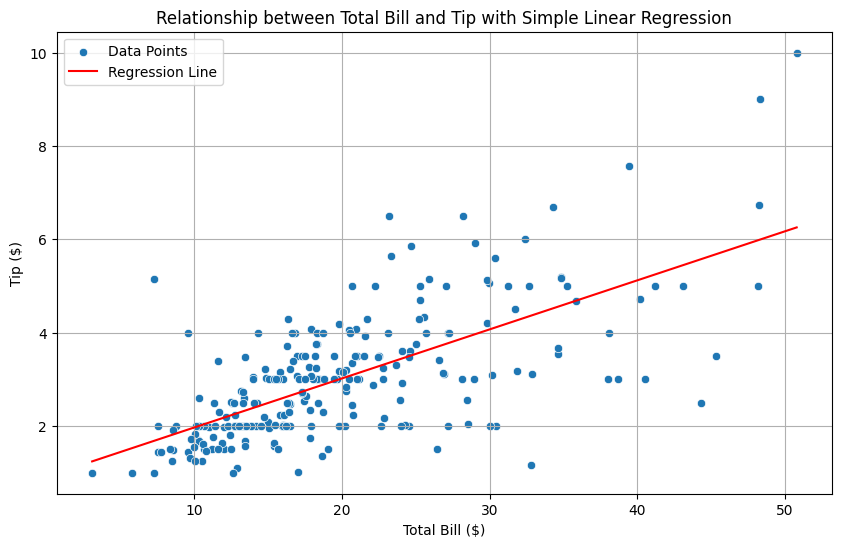

In [6]:
# prompt: Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
# simple linear regression and visualizes the results

# Load the tips dataset
tips = sns.load_dataset("tips")

# Perform simple linear regression using statsmodels
# Define independent (X) and dependent (y) variables
# We use 'total_bill' as the independent variable and 'tip' as the dependent variable
X = tips['total_bill']
y = tips['tip']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Visualize the relationship and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, label='Data Points')

# Plot the regression line using the model predictions
# Create a range of total_bill values to plot the line
x_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
y_pred_line = model.predict(sm.add_constant(x_range))
plt.plot(x_range, y_pred_line, color='red', label='Regression Line')

plt.title('Relationship between Total Bill and Tip with Simple Linear Regression')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()
plt.grid(True)
plt.show()

Synthetic Data Linear Regression Model:
Coefficient: 2.97
Intercept: 4.22


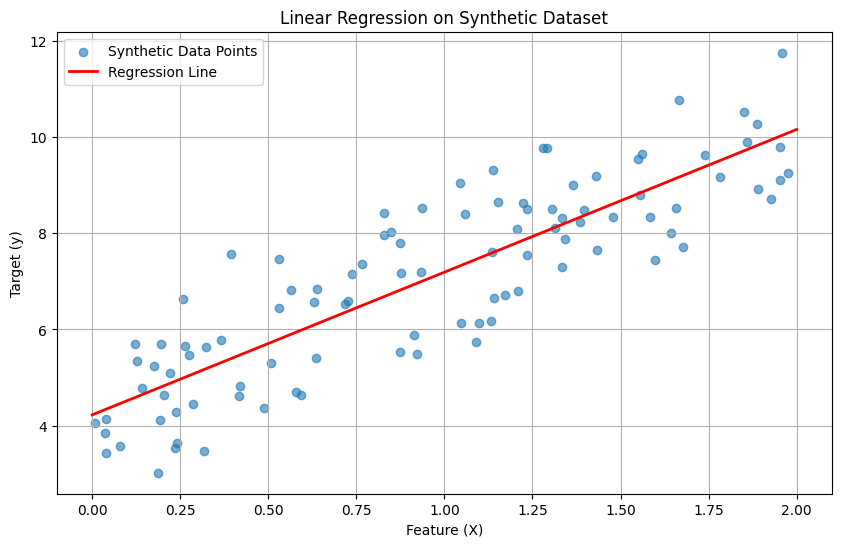


Prediction for X = 1.5: 8.67


In [7]:
# prompt:  Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
# model to predict new values and plot the data points along with the regression line.

# Generate a synthetic dataset
np.random.seed(0)
X_synth = 2 * np.random.rand(100, 1)
y_synth = 4 + 3 * X_synth + np.random.randn(100, 1)

# Create and fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_synth, y_synth)

# Get the coefficient and intercept
synth_coefficient = lin_reg.coef_[0][0]
synth_intercept = lin_reg.intercept_[0]

print(f"Synthetic Data Linear Regression Model:")
print(f"Coefficient: {synth_coefficient:.2f}")
print(f"Intercept: {synth_intercept:.2f}")

# Make predictions for plotting the regression line
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# Plot the synthetic data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_synth, y_synth, alpha=0.6, label='Synthetic Data Points')
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Predict a new value
new_value = np.array([[1.5]])
predicted_target = lin_reg.predict(new_value)
print(f"\nPrediction for X = 1.5: {predicted_target[0][0]:.2f}")


In [9]:
# prompt: Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle

# Define the filename to save the pickled model
filename = 'linear_regression_model.pkl'

# Save the trained simple_model (which is the LinearRegression model from scikit-learn)
try:
    with open(filename, 'wb') as file:
        pickle.dump(simple_model, file)
    print(f"Model successfully pickled and saved to {filename}")
except Exception as e:
    print(f"Error pickling the model: {e}")

# To demonstrate loading the model:
# try:
#     with open(filename, 'rb') as file:
#         loaded_model = pickle.load(file)
#     print(f"\nModel successfully loaded from {filename}")

#     # You can now use loaded_model for predictions
#     # Example:
#     # new_carat_value = np.array([[0.5]])
#     # prediction_from_loaded_model = loaded_model.predict(new_carat_value)
#     # print(f"Prediction for carat 0.5 using loaded model: {prediction_from_loaded_model[0]:.2f}")

# prompt: Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle

# Define the filename to save the pickled model
filename = 'linear_regression_model.pkl'

# Save the trained simple_model (which is the LinearRegression model from scikit-learn)
try:
    with open(filename, 'wb') as file:
        pickle.dump(simple_model, file)
    print(f"Model successfully pickled and saved to {filename}")
except Exception as e:
    print(f"Error pickling the model: {e}")

# To demonstrate loading the model:
# try:
#     with open(filename, 'rb') as file:
#         loaded_model = pickle.load(file)
#     print(f"\nModel successfully loaded from {filename}")

#     # You can now use loaded_model for predictions
#     # Example:
#     # new_carat_value = np.array([[0.5]])
#     # prediction_from_loaded_model = loaded_model.predict(new_carat_value)
#     # print(f"Prediction for carat 0.5 using loaded model: {prediction_from_loaded_model[0]:.2f}")

# except Exception as e:
#     print(f"Error loading the model: {e}")

Model successfully pickled and saved to linear_regression_model.pkl
Model successfully pickled and saved to linear_regression_model.pkl


Polynomial Regression Model (Degree 2):
Coefficients: [3.84100842 0.54809407]
Intercept: 3.95


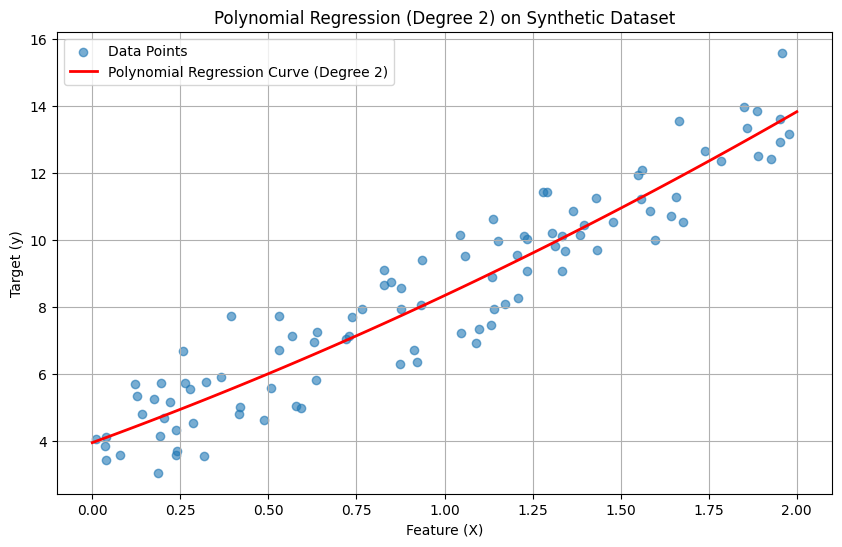


Prediction for X = 1.5: 10.95


In [10]:
# prompt:  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
# regression curve

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + X**2 + np.random.randn(100, 1) # Added quadratic term

# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create and fit the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Get the coefficients and intercept
print(f"Polynomial Regression Model (Degree 2):")
print(f"Coefficients: {poly_reg.coef_[0]}")
print(f"Intercept: {poly_reg.intercept_[0]:.2f}")

# Make predictions for plotting the regression curve
X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_predict = poly_reg.predict(X_new_poly)

# Plot the data points and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Polynomial Regression Curve (Degree 2)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 2) on Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Predict a new value
new_value = np.array([[1.5]])
new_value_poly = poly_features.transform(new_value)
predicted_target = poly_reg.predict(new_value_poly)
print(f"\nPrediction for X = 1.5: {predicted_target[0][0]:.2f}")

In [11]:
# prompt: . Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
# regression model to the data. Print the model's coefficient and intercept.

# Generate synthetic data for simple linear regression
np.random.seed(42) # for reproducibility
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3X + noise

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the synthetic data
model.fit(X, y)

# Print the coefficient and intercept
print("Simple Linear Regression Model on Synthetic Data:")
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Simple Linear Regression Model on Synthetic Data:
Coefficient: 2.7701
Intercept: 4.2151


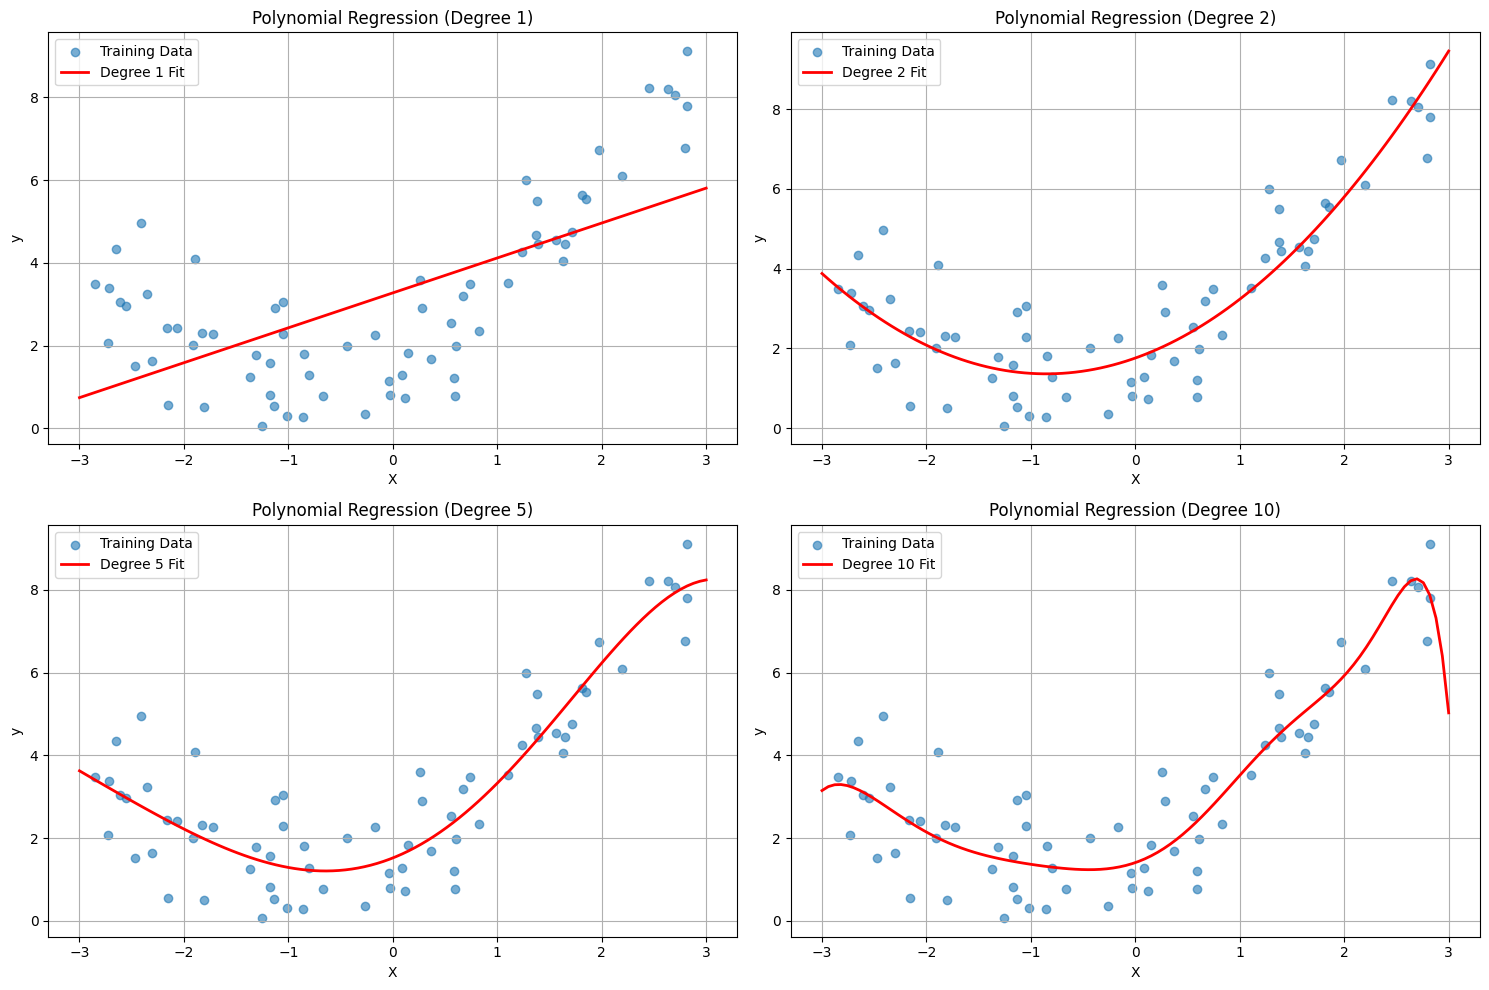


Polynomial Regression Model Performance Comparison:
------------------------------------------------------------
Degree    MSE            R-squared      
------------------------------------------------------------
1         3.73710.3398
2         0.56270.9006
5         0.69130.8779
10        0.99370.8245
------------------------------------------------------------


<ipython-input-12-035a121eff44>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degrees_list, y=r2_scores_list, palette='viridis')


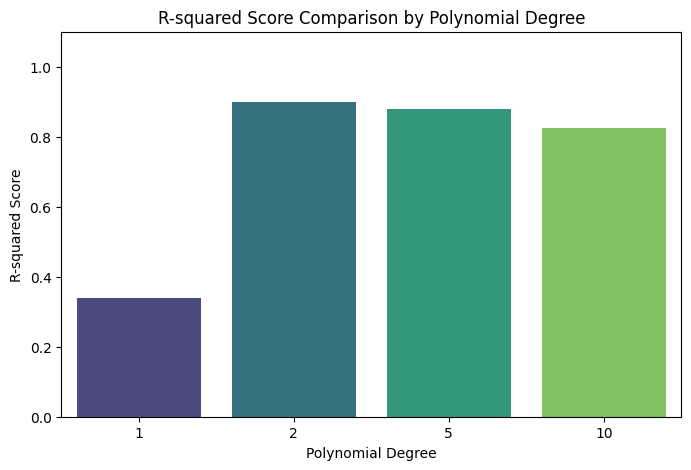

<ipython-input-12-035a121eff44>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degrees_list, y=mse_scores_list, palette='plasma')


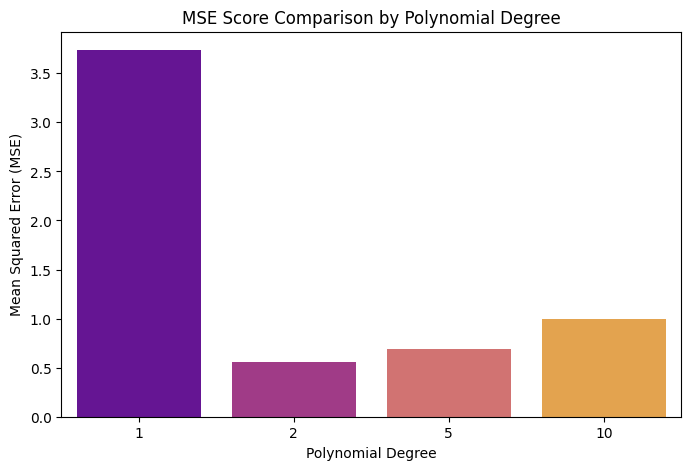

In [12]:
# prompt: Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
# compares their performance

# Generate a synthetic dataset for polynomial regression
np.random.seed(42) # for reproducibility
m = 100 # number of samples
X = 6 * np.random.rand(m, 1) - 3 # X values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = 0.5X^2 + X + 2 + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different polynomial degrees to test
degrees = [1, 2, 5, 10]

# Dictionary to store results (degree: {'MSE': mse, 'R-squared': r2})
poly_results = {}

plt.figure(figsize=(15, 10))

# Iterate through different polynomial degrees
for i, degree in enumerate(degrees):
  # Create a pipeline: polynomial features transformation + linear regression
  pipeline = Pipeline([
      ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
      ('linear_reg', LinearRegression())
  ])

  # Train the model
  pipeline.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = pipeline.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Store the results
  poly_results[degree] = {'MSE': mse, 'R-squared': r2}

  # For plotting the regression curve
  X_new = np.linspace(-3, 3, 100).reshape(100, 1)
  y_predict_plot = pipeline.predict(X_new)

  # Plot the training data and the fitted curve
  plt.subplot(2, 2, i + 1)
  plt.scatter(X_train, y_train, alpha=0.6, label='Training Data')
  plt.plot(X_new, y_predict_plot, "r-", linewidth=2, label=f'Degree {degree} Fit')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title(f'Polynomial Regression (Degree {degree})')
  plt.legend()
  plt.grid(True)

plt.tight_layout()
plt.show()

# Print the performance results
print("\nPolynomial Regression Model Performance Comparison:")
print("-" * 60)
print(f"{'Degree':<10}{'MSE':<15}{'R-squared':<15}")
print("-" * 60)
for degree, metrics in poly_results.items():
  print(f"{degree:<10}{metrics['MSE']:.4f}{metrics['R-squared']:.4f}")
print("-" * 60)

# Optional: Visualize the R-squared scores
degrees_list = list(poly_results.keys())
r2_scores_list = [poly_results[degree]['R-squared'] for degree in degrees_list]

plt.figure(figsize=(8, 5))
sns.barplot(x=degrees_list, y=r2_scores_list, palette='viridis')
plt.title('R-squared Score Comparison by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared Score')
plt.ylim(0, 1.1)
plt.show()

# Optional: Visualize the MSE scores
mse_scores_list = [poly_results[degree]['MSE'] for degree in degrees_list]

plt.figure(figsize=(8, 5))
sns.barplot(x=degrees_list, y=mse_scores_list, palette='plasma')
plt.title('MSE Score Comparison by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [13]:
# prompt:  Write a Python script that fits a simple linear regression model with two features and prints the model's
# coefficients, intercept, and R-squared score.

# Load the tips dataset again for a simple linear regression example with two features
tips = sns.load_dataset("tips")

# Select two independent variables ('total_bill' and 'size') and the dependent variable ('tip')
X_two_features = tips[['total_bill', 'size']]
y_two_features = tips['tip']

# Split the data into training and testing sets
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_two_features, y_two_features, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_model_two_features = LinearRegression()

# Fit the model to the training data
linear_model_two_features.fit(X_train_tf, y_train_tf)

# Get the coefficients and intercept
coefficients_tf = linear_model_two_features.coef_
intercept_tf = linear_model_two_features.intercept_

print("Simple Linear Regression Model with Two Features ('total_bill', 'size'):")
print(f"Coefficients: {coefficients_tf}") # Will show coefficients for total_bill and size
print(f"Intercept: {intercept_tf:.4f}")

# Make predictions on the test set
y_pred_tf = linear_model_two_features.predict(X_test_tf)

# Calculate the R-squared score
r2_tf = r2_score(y_test_tf, y_pred_tf)
print(f"R-squared Score: {r2_tf:.4f}")

Simple Linear Regression Model with Two Features ('total_bill', 'size'):
Coefficients: [0.09088117 0.26501754]
Intercept: 0.5681
R-squared Score: 0.4811


Simple Linear Regression Model on Synthetic Data:
Coefficient: 2.7701
Intercept: 4.2151


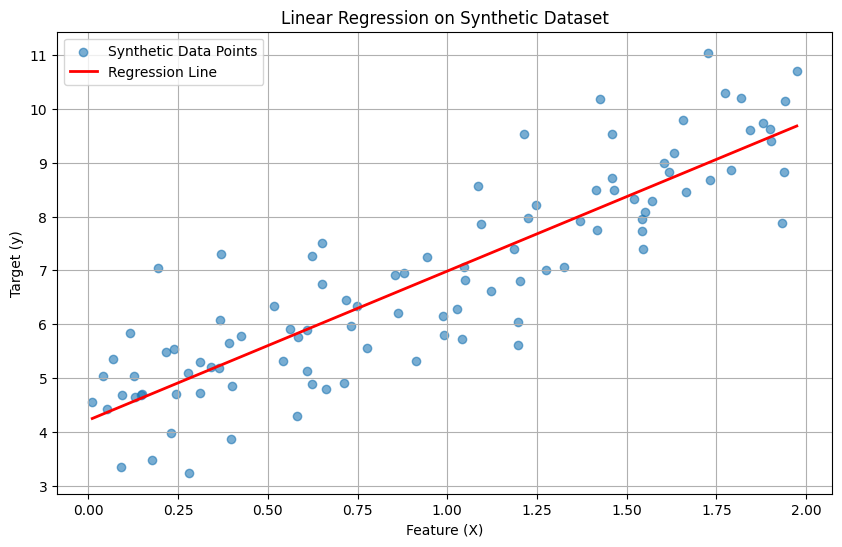


Prediction for X = 1.5: 8.3703


In [14]:
# prompt: Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
# regression line along with the data points.

# Generate synthetic data
np.random.seed(42) # for reproducibility
X_synth = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y_synth = 4 + 3 * X_synth + np.random.randn(100, 1) # y = 4 + 3X + noise

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the synthetic data
model.fit(X_synth, y_synth)

# Print the coefficient and intercept
print("Simple Linear Regression Model on Synthetic Data:")
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

# Make predictions for plotting the regression line
# We'll create a range of X values to plot the line from min to max of the synthetic data
X_new = np.array([[X_synth.min()], [X_synth.max()]]) # Use min and max X values
y_predict = model.predict(X_new)

# Plot the synthetic data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_synth, y_synth, alpha=0.6, label='Synthetic Data Points')
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Predict a new value (optional)
new_value = np.array([[1.5]])
predicted_target = model.predict(new_value)
print(f"\nPrediction for X = 1.5: {predicted_target[0][0]:.4f}")


In [16]:
# prompt:  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
# with multiple features.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select the numerical independent variables
# Exclude 'price' as it's the dependent variable
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Add a constant to the independent variables matrix for the intercept
# VIF requires a constant for calculation
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature, including the 'const' column
vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i)
                          for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) for features:")
print(vif_data)

# Interpretation of VIF values:
# VIF = 1: No correlation between the variable and the others.
# 1 < VIF < 5: Moderately correlated.
# VIF > 5 or 10: Highly correlated.
# Features with VIF > 10 are often considered to have high multicollinearity.
print("\nInterpretation:")
print("- VIF = 1: No correlation.")
print("- 1 < VIF < 5: Moderate correlation.")
print("- VIF > 5 or 10: High correlation (potential multicollinearity issues).")

# Based on the output, assess which features have high VIF and might contribute to multicollinearity.
# For example, if 'carat', 'x', 'y', and 'z' have high VIF, it confirms the high correlation observed
# in the previous correlation matrix visualization.

Variance Inflation Factor (VIF) for features:
  feature          VIF
0   const  4821.696350
1   carat    21.602712
2   depth     1.496590
3   table     1.143225
4       x    56.187704
5       y    20.454295
6       z    23.530049

Interpretation:
- VIF = 1: No correlation.
- 1 < VIF < 5: Moderate correlation.
- VIF > 5 or 10: High correlation (potential multicollinearity issues).


Polynomial Regression Model (Degree 4):
Coefficients: [ 1.09166565  1.14917903 -0.56746375  0.09360967]
Intercept: 2.85


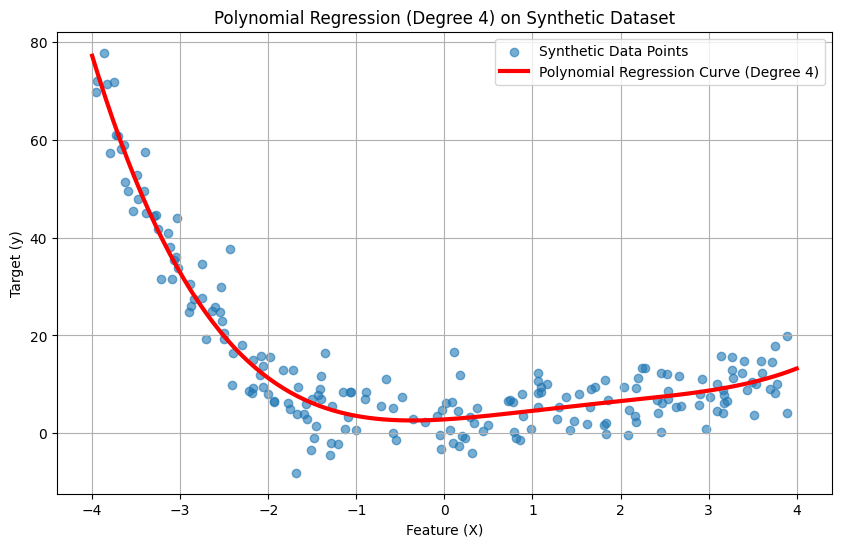


Prediction for X = 2.5: 7.55

Model Evaluation on Synthetic Data:
Mean Squared Error (MSE): 22.83
R-squared Score: 0.9239


In [17]:
# prompt:  Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
# polynomial regression model, and plots the regression curve

# Generate synthetic data for a polynomial relationship of degree 4
np.random.seed(42) # for reproducibility
m = 200 # number of samples
X = 8 * np.random.rand(m, 1) - 4 # X values between -4 and 4
# True relationship: y = 0.1 * X^4 - 0.5 * X^3 + 1 * X^2 + 0.5 * X + 3 + noise
y = 0.1 * X**4 - 0.5 * X**3 + 1 * X**2 + 0.5 * X + 3 + np.random.randn(m, 1) * 5

# Create polynomial features (degree 4)
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create and fit the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Print the coefficients and intercept
print(f"Polynomial Regression Model (Degree 4):")
print(f"Coefficients: {poly_reg.coef_[0]}")
print(f"Intercept: {poly_reg.intercept_[0]:.2f}")

# Make predictions for plotting the regression curve
# Create a smooth range of X values
X_new = np.linspace(-4, 4, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)
y_predict = poly_reg.predict(X_new_poly)

# Plot the synthetic data points and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Synthetic Data Points')
plt.plot(X_new, y_predict, "r-", linewidth=3, label='Polynomial Regression Curve (Degree 4)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 4) on Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Predict a new value (optional)
new_value = np.array([[2.5]])
new_value_poly = poly_features.transform(new_value)
predicted_target = poly_reg.predict(new_value_poly)
print(f"\nPrediction for X = 2.5: {predicted_target[0][0]:.2f}")

# Evaluate the model (optional)
y_true_fitted = poly_reg.predict(X_poly)
mse = mean_squared_error(y, y_true_fitted)
r2 = r2_score(y, y_true_fitted)

print(f"\nModel Evaluation on Synthetic Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

In [18]:
# prompt: Write a Python script that creates a machine learning pipeline with data standardization and a multiple
# linear regression model, and prints the R-squared score.

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select independent and dependent variables
# We'll use a few numerical features as predictors
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with data standardization and a Linear Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: Data Standardization
    ('linear_regressor', LinearRegression()) # Step 2: Multiple Linear Regression Model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared Score of the Multiple Linear Regression Pipeline: {r2:.4f}")


R-squared Score of the Multiple Linear Regression Pipeline: 0.8590


Polynomial Regression Model (Degree 3):
Coefficients: [0.91191368 1.94889273 0.51210773]
Intercept: 0.35


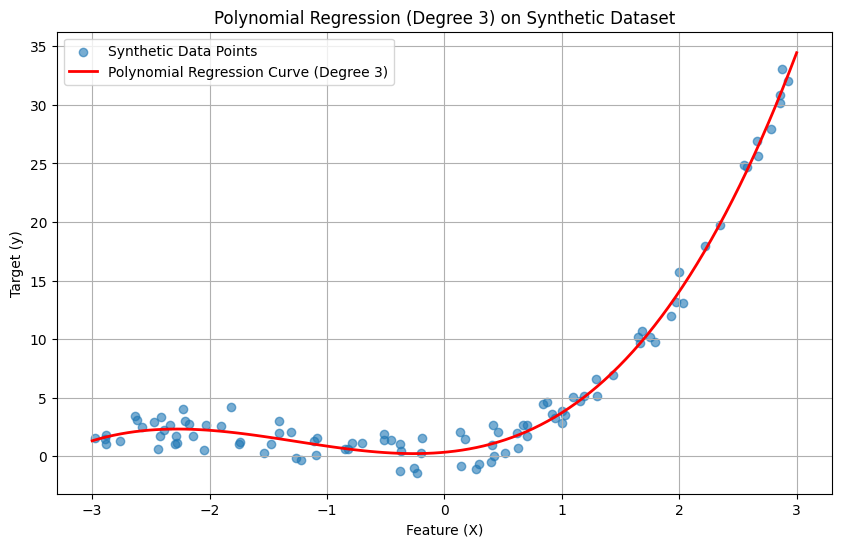


Prediction for X = 2.0: 14.06


In [19]:
# prompt:  Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
# regression curve

# Generate a synthetic dataset for polynomial regression
np.random.seed(0)
m = 100 # number of samples
X = 6 * np.random.rand(m, 1) - 3 # X values between -3 and 3
y = 0.5 * X**3 + 2 * X**2 + X + np.random.randn(m, 1) # y = 0.5X^3 + 2X^2 + X + noise

# Create polynomial features (degree 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create and fit the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Get the coefficients and intercept
print(f"Polynomial Regression Model (Degree 3):")
# The coefficients correspond to X^1, X^2, X^3
print(f"Coefficients: {poly_reg.coef_[0]}")
print(f"Intercept: {poly_reg.intercept_[0]:.2f}")

# Make predictions for plotting the regression curve
# Create a smooth range of X values
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_predict = poly_reg.predict(X_new_poly)

# Plot the synthetic data points and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Synthetic Data Points')
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Polynomial Regression Curve (Degree 3)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 3) on Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Predict a new value (optional)
new_value = np.array([[2.0]])
new_value_poly = poly_features.transform(new_value)
predicted_target = poly_reg.predict(new_value_poly)
print(f"\nPrediction for X = 2.0: {predicted_target[0][0]:.2f}")

In [20]:
# prompt:  Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
# the R-squared score and model coefficients.

# Generate a synthetic dataset with 5 features
np.random.seed(42) # for reproducibility
n_samples = 200
n_features = 5

# Generate features (e.g., from a normal distribution)
X_synth_multi = np.random.rand(n_samples, n_features) * 10

# Define true coefficients and intercept
true_coefficients = np.array([2.5, -1.2, 0.8, 4.1, -0.5])
true_intercept = 5.0

# Generate target variable with noise
# y = intercept + sum(coef_i * X_i) + noise
y_synth_multi = true_intercept + X_synth_multi.dot(true_coefficients) + np.random.randn(n_samples) * 5

# Create a Linear Regression model
multi_linear_reg = LinearRegression()

# Fit the model to the synthetic data
multi_linear_reg.fit(X_synth_multi, y_synth_multi)

# Make predictions (optional)
y_pred_multi = multi_linear_reg.predict(X_synth_multi)

# Calculate the R-squared score
r2_multi = r2_score(y_synth_multi, y_pred_multi)

# Print the R-squared score and model coefficients
print("Multiple Linear Regression on Synthetic Dataset:")
print(f"R-squared Score: {r2_multi:.4f}")
print(f"Model Coefficients: {multi_linear_reg.coef_}")
print(f"Model Intercept: {multi_linear_reg.intercept_:.4f}")


Multiple Linear Regression on Synthetic Dataset:
R-squared Score: 0.9132
Model Coefficients: [ 2.54117207 -1.32939014  0.81585494  4.13152829 -0.47864686]
Model Intercept: 5.8145


Simple Linear Regression Model on Synthetic Data:
Coefficient: 2.7701
Intercept: 4.2151


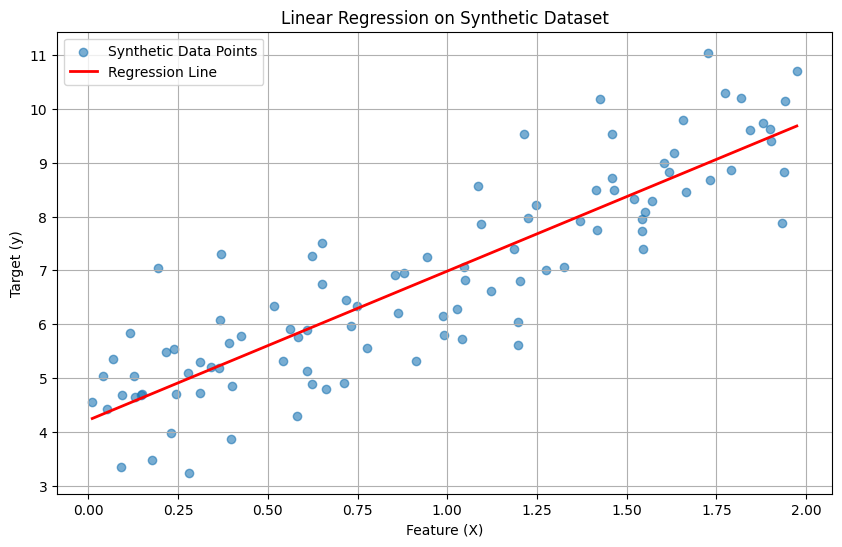


Prediction for X = 1.5: 8.3703


In [21]:
# prompt:  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
# data points along with the regression line

# Generate synthetic data for simple linear regression
np.random.seed(42) # for reproducibility
X_synth = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y_synth = 4 + 3 * X_synth + np.random.randn(100, 1) # y = 4 + 3X + noise

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the synthetic data
model.fit(X_synth, y_synth)

# Print the coefficient and intercept
print("Simple Linear Regression Model on Synthetic Data:")
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

# Make predictions for plotting the regression line
# We'll create a range of X values to plot the line from min to max of the synthetic data
X_new = np.array([[X_synth.min()], [X_synth.max()]]) # Use min and max X values
y_predict = model.predict(X_new)

# Plot the synthetic data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_synth, y_synth, alpha=0.6, label='Synthetic Data Points')
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Predict a new value (optional)
new_value = np.array([[1.5]])
predicted_target = model.predict(new_value)
print(f"\nPrediction for X = 1.5: {predicted_target[0][0]:.4f}")


In [22]:
# prompt: Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R
# squared score and coefficients.

# Generate a synthetic dataset with 3 features
np.random.seed(42) # for reproducibility
n_samples = 150
n_features = 3

# Generate features (e.g., from a normal distribution)
X_synth = np.random.rand(n_samples, n_features) * 10

# Define true coefficients and intercept
true_coefficients = np.array([1.5, -0.7, 3.2])
true_intercept = 10.0

# Generate target variable with noise
# y = intercept + sum(coef_i * X_i) + noise
y_synth = true_intercept + X_synth.dot(true_coefficients) + np.random.randn(n_samples) * 3

# Create a Linear Regression model
multi_linear_reg = LinearRegression()

# Fit the model to the synthetic data
multi_linear_reg.fit(X_synth, y_synth)

# Make predictions on the synthetic data to evaluate performance on the generated data
y_pred = multi_linear_reg.predict(X_synth)

# Calculate the R-squared score
r2 = r2_score(y_synth, y_pred)

# Print the R-squared score and model coefficients
print("Multiple Linear Regression on Synthetic Dataset with 3 Features:")
print(f"R-squared Score: {r2:.4f}")
print(f"Model Coefficients: {multi_linear_reg.coef_}")
print(f"Model Intercept: {multi_linear_reg.intercept_:.4f}")

Multiple Linear Regression on Synthetic Dataset with 3 Features:
R-squared Score: 0.9146
Model Coefficients: [ 1.30140819 -0.74267854  3.14118157]
Model Intercept: 11.5614


In [23]:
# prompt:  Write a Python script that demonstrates how to serialize and deserialize machine learning models using
# joblib instead of pickling

!pip install joblib
import joblib
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate some sample data
X_sample = 2 * np.random.rand(100, 1)
y_sample = 4 + 3 * X_sample + np.random.randn(100, 1)

# Create and train a Linear Regression model
sample_model = LinearRegression()
sample_model.fit(X_sample, y_sample)

# Define the filename to save the joblib model
joblib_filename = 'linear_regression_model.joblib'

# Serialize (save) the model using joblib
try:
  joblib.dump(sample_model, joblib_filename)
  print(f"Model successfully serialized and saved to {joblib_filename}")
except Exception as e:
  print(f"Error serializing the model using joblib: {e}")

# Demonstrate deserializing (loading) the model
try:
  loaded_model_joblib = joblib.load(joblib_filename)
  print(f"\nModel successfully deserialized and loaded from {joblib_filename}")

  # You can now use the loaded_model_joblib for predictions
  # Example prediction:
  new_value_joblib = np.array([[1.5]])
  prediction_from_loaded_model_joblib = loaded_model_joblib.predict(new_value_joblib)
  print(f"Prediction for X = 1.5 using loaded joblib model: {prediction_from_loaded_model_joblib[0][0]:.2f}")

except Exception as e:
  print(f"Error deserializing the model using joblib: {e}")


Model successfully serialized and saved to linear_regression_model.joblib

Model successfully deserialized and loaded from linear_regression_model.joblib
Prediction for X = 1.5 using loaded joblib model: 8.45


Linear Regression with One-Hot Encoding on Tips Dataset:
Mean Squared Error (MSE): 0.70
Root Mean Squared Error (RMSE): 0.84
R-squared Score: 0.4373

Model Coefficients (Scaled Features):
  total_bill: 0.8284
  size: 0.2191
  day_Fri: 0.0507
  day_Sat: -0.0029
  day_Sun: 0.0598
  sex_Female: -0.0137
  smoker_No: 0.0936
  time_Dinner: -0.0422
Intercept: 3.0878


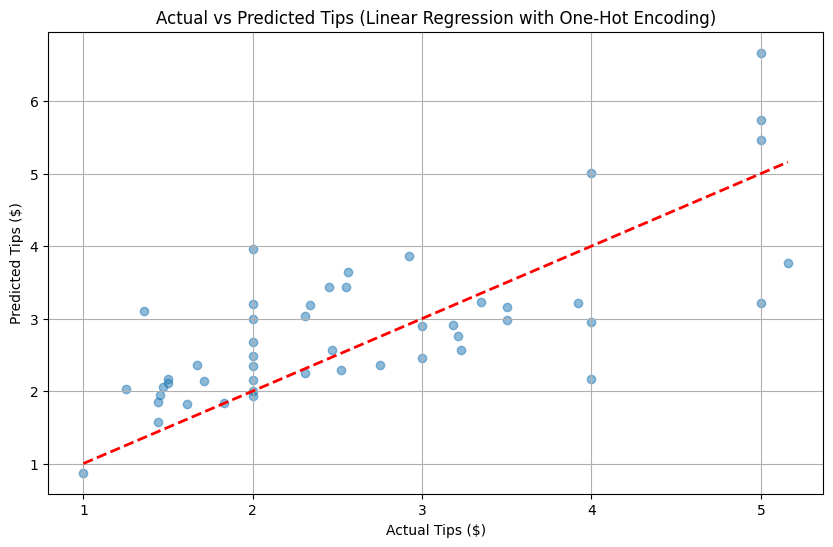

In [24]:
# prompt:  Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
# the Seaborn 'tips' dataset.

# Load the tips dataset
tips = sns.load_dataset("tips")

# 1. Handle Categorical Features using One-Hot Encoding
# Select features and target variable
# The categorical features are 'sex', 'smoker', 'day', 'time'
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

# Apply one-hot encoding to the categorical columns
X = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
# `drop_first=True` prevents multicollinearity by dropping one category from each feature

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the numerical features (optional but recommended for linear models)
# We need to identify which columns are still numerical after one-hot encoding
numerical_cols = ['total_bill', 'size']
# Get the list of one-hot encoded columns
encoded_cols = list(X.columns.difference(numerical_cols))
all_features = numerical_cols + encoded_cols # Ensure columns are in the same order

# Create a scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[all_features])
X_test_scaled = scaler.transform(X_test[all_features])

# Convert scaled arrays back to DataFrames (optional, but helpful for understanding)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_features, index=X_test.index)


# 4. Train the Linear Regression Model
model = LinearRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# 5. Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression with One-Hot Encoding on Tips Dataset:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Optional: Print the coefficients and intercept
# The coefficients now correspond to the scaled features, including the one-hot encoded ones
print("\nModel Coefficients (Scaled Features):")
for col, coef in zip(X_train_scaled.columns, model.coef_):
  print(f"  {col}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Optional: Plot predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Tips ($)")
plt.ylabel("Predicted Tips ($)")
plt.title("Actual vs Predicted Tips (Linear Regression with One-Hot Encoding)")
plt.grid(True)
plt.show()

--- Linear Regression ---
Coefficient: 2.9903
Intercept: 4.2063
R-squared Score: 0.6521
-------------------------
--- Ridge Regression ---
Coefficient: 2.8893
Intercept: 4.2989
R-squared Score: 0.6540
-------------------------

--- Comparison ---
Linear Regression vs Ridge Regression on Synthetic Dataset:
Linear Regression Coefficient: 2.9903, R-squared: 0.6521
Ridge Regression Coefficient: 2.8893, R-squared: 0.6540


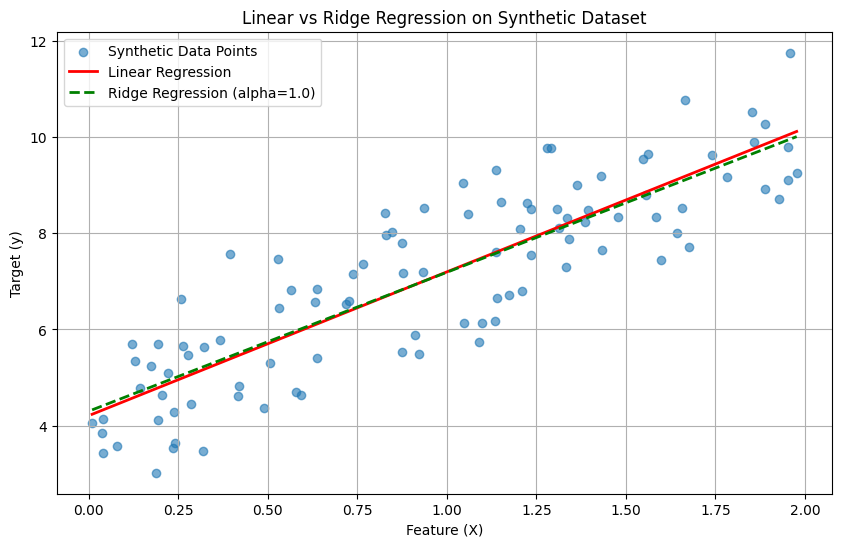

In [28]:
# Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R
# squared score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

np.random.seed(0)
X_synth = 2 * np.random.rand(100, 1)
y_synth = 4 + 3 * X_synth + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_synth, y_synth, test_size=0.2, random_state=42)

# --- Linear Regression ---
print("--- Linear Regression ---")
# Create and fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Get the coefficient and intercept
# Access the single coefficient directly, then the scalar value from the resulting array
lin_reg_coefficient = lin_reg.coef_[0].item()
lin_reg_intercept = lin_reg.intercept_[0].item()


# Access the scalar value inside the NumPy array for formatting
print(f"Coefficient: {lin_reg_coefficient:.4f}")
print(f"Intercept: {lin_reg_intercept:.4f}")

# Make predictions on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate R-squared score
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print(f"R-squared Score: {r2_lin_reg:.4f}")
print("-" * 25)

# --- Ridge Regression ---
print("--- Ridge Regression ---")
# Create and fit the Ridge Regression model
# alpha is the regularization strength (L2 penalty)
ridge_reg = Ridge(alpha=1.0) # You can experiment with different alpha values
ridge_reg.fit(X_train, y_train)

# Get the coefficient and intercept
# Access the single coefficient directly, then the scalar value from the resulting array
ridge_reg_coefficient = ridge_reg.coef_[0].item()
ridge_reg_intercept = ridge_reg.intercept_[0].item()


# Access the scalar value inside the NumPy array for formatting
print(f"Coefficient: {ridge_reg_coefficient:.4f}")
print(f"Intercept: {ridge_reg_intercept:.4f}")

# Make predictions on the test set
y_pred_ridge_reg = ridge_reg.predict(X_test)

# Calculate R-squared score
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)
print(f"R-squared Score: {r2_ridge_reg:.4f}")
print("-" * 25)

# --- Comparison ---
print("\n--- Comparison ---")
print("Linear Regression vs Ridge Regression on Synthetic Dataset:")
# Access the scalar values for printing
print(f"Linear Regression Coefficient: {lin_reg_coefficient:.4f}, R-squared: {r2_lin_reg:.4f}")
print(f"Ridge Regression Coefficient: {ridge_reg_coefficient:.4f}, R-squared: {r2_ridge_reg:.4f}")

# Plot the data and both regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X_synth, y_synth, alpha=0.6, label='Synthetic Data Points')

# Linear Regression line
X_new = np.array([[X_synth.min()], [X_synth.max()]])
y_predict_lin_reg = lin_reg.predict(X_new)
plt.plot(X_new, y_predict_lin_reg, "r-", linewidth=2, label='Linear Regression')

# Ridge Regression line
y_predict_ridge_reg = ridge_reg.predict(X_new)
plt.plot(X_new, y_predict_ridge_reg, "g--", linewidth=2, label=f'Ridge Regression (alpha=1.0)')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear vs Ridge Regression on Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Note: With simple synthetic data and no multicollinearity, the difference between
# Linear Regression and Ridge Regression coefficients and R-squared might be small.
# Ridge Regression becomes more impactful when dealing with multicollinearity
# and/or larger datasets with many features.

In [29]:
# prompt:  Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
# dataset

from sklearn.model_selection import cross_val_score, KFold

# Generate a synthetic dataset
np.random.seed(42) # for reproducibility
X_synth = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y_synth = 4 + 3 * X_synth + np.random.randn(100, 1) # y = 4 + 3X + noise

# Create a Linear Regression model
model = LinearRegression()

# Define the cross-validation strategy
# We'll use KFold with 5 splits
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
# We'll use the negative mean squared error as the scoring metric
# cross_val_score returns an array of scores, one for each fold
# By default, scores are higher for better models, so we use negative MSE.
# To get positive MSE, we negate the scores.
scores = cross_val_score(model, X_synth, y_synth, scoring='neg_mean_squared_error', cv=kf)

# Convert negative MSE scores to positive MSE
mse_scores = -scores

# Calculate the average MSE and standard deviation across folds
average_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Cross-Validation Results (Linear Regression on Synthetic Data):")
print(f"  Number of folds: {k}")
print(f"  MSE scores for each fold: {mse_scores}")
print(f"  Average MSE: {average_mse:.4f}")
print(f"  Standard Deviation of MSE: {std_mse:.4f}")

# Optional: Perform cross-validation using R-squared as the metric
r2_scores = cross_val_score(model, X_synth, y_synth, scoring='r2', cv=kf)

# Calculate the average R-squared and standard deviation across folds
average_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

print(f"\nCross-Validation Results (Linear Regression on Synthetic Data - R-squared):")
print(f"  R-squared scores for each fold: {r2_scores}")
print(f"  Average R-squared: {average_r2:.4f}")
print(f"  Standard Deviation of R-squared: {std_r2:.4f}")

Cross-Validation Results (Linear Regression on Synthetic Data):
  Number of folds: 5
  MSE scores for each fold: [0.65369951 0.698667   1.11524148 0.73866869 0.97590007]
  Average MSE: 0.8364
  Standard Deviation of MSE: 0.1784

Cross-Validation Results (Linear Regression on Synthetic Data - R-squared):
  R-squared scores for each fold: [0.80720596 0.84385229 0.34126864 0.80379071 0.74639958]
  Average R-squared: 0.7085
  Standard Deviation of R-squared: 0.1862


R-squared Scores for Polynomial Regression Models of Different Degrees:
------------------------------------------------------------
Degree    R-squared      
------------------------------------------------------------
1         0.3398
2         0.9006
3         0.8970
4         0.8761
5         0.8779
10        0.8245
------------------------------------------------------------


<ipython-input-30-15fd6ab50c3f>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degrees_list, y=r2_scores_list, palette='viridis')


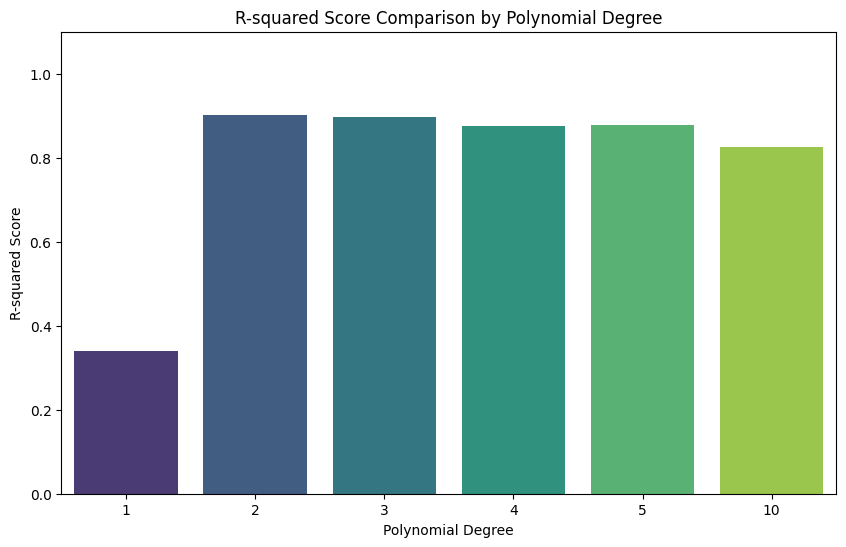

In [30]:
# prompt: Write a Python script that compares polynomial regression models of different degrees and prints the R
# squared score for each

# Generate a synthetic dataset for polynomial regression comparison
np.random.seed(42) # for reproducibility
m = 100 # number of samples
X = 6 * np.random.rand(m, 1) - 3 # X values between -3 and 3
# True relationship: y = 0.5 * X^2 + X + 2 + noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different polynomial degrees to test
degrees = [1, 2, 3, 4, 5, 10] # Added more degrees for comparison

# Dictionary to store R-squared scores
r2_scores_by_degree = {}

# Iterate through different polynomial degrees
for degree in degrees:
    # Create a pipeline: polynomial features transformation + linear regression
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear_reg', LinearRegression())
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Store the R-squared score
    r2_scores_by_degree[degree] = r2

# Print the R-squared scores for each degree
print("R-squared Scores for Polynomial Regression Models of Different Degrees:")
print("-" * 60)
print(f"{'Degree':<10}{'R-squared':<15}")
print("-" * 60)
for degree, r2 in r2_scores_by_degree.items():
    print(f"{degree:<10}{r2:.4f}")
print("-" * 60)

# Optional: Visualize the R-squared scores
degrees_list = list(r2_scores_by_degree.keys())
r2_scores_list = [r2_scores_by_degree[degree] for degree in degrees_list]

plt.figure(figsize=(10, 6))
sns.barplot(x=degrees_list, y=r2_scores_list, palette='viridis')
plt.title('R-squared Score Comparison by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared Score')
plt.ylim(0, 1.1) # Extend y-axis slightly for better visualization
plt.show()
